In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv(r"C:\Users\brian\Desktop\Python\Mayo Model\Data_outcome_deidentified.csv", low_memory=False)
df.drop(['POST','PRE','causeofdeath','primcauseofdeath','death.info','numdisvessels','maxlesionlength', 'wposttimi', 'numbms','numdes', 'numstents', 'maxdevdiameter', 'maxdevlength','otherventsupport\nYes:1 \nNo:0'],axis=1,inplace=True)
effect = ['Inhospital mortality\nYes:1\nNo:0','Mortality 6 months\nYes:1\nNo:0', 'Mortality 1 yr\nYes:1\nNo:0','Mortality 2 yr\nYes:1\nNo:0', 'Mortality 5yr\nYes:1\nNo:0','Time from PCI to Stroke_6mo', 'Time from PCI to Stroke_1yr','Time from PCI to Stroke_2yr', 'Time from PCI to Stroke_5yr']

test_conf = pd.read_csv(r"C:\Users\brian\Desktop\Python\Mayo Model\test_results.csv", header=0)
test_conf = test_conf.drop(['Unnamed: 0'], axis=1)
train_conf = pd.read_csv(r"C:\Users\brian\Desktop\Python\Mayo Model\train_results.csv", header=0)
train_conf = train_conf.drop(['Unnamed: 0'], axis=1)
train_ranges = [6364, 5930, 5210, 4347, 3179, 5598, 5071, 4153, 2104]
test_ranges = [6365, 5931, 5211, 4348, 3179, 5599, 5072, 4154, 2104]

In [4]:
e = 0
y = test_conf[effect[e]]
X = df.drop(effect,axis=1)
X = X.iloc[test_ranges[e]:]
#y = y.iloc[test_ranges[e]:]


In [4]:
e = 0
y = train_conf[effect[e]]
X = df.drop(effect,axis=1)
X = X.iloc[:train_ranges[e]]
y = y.iloc[:train_ranges[e]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10,12,13,15],
    "min_samples_leaf": [1,2,5,7,10,12,13,15]
}

#clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X, y)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y, grid_cv.predict(X)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y, grid_cv.predict(X)))

ValueError: Found input variables with inconsistent numbers of samples: [6364, 6366]

In [62]:
temp = pd.DataFrame()
temp['Inhospital mortality\nYes:1\nNo:0','Mortality 6 months\nYes:1\nNo:0'] = y
temp.to_csv("check_train_data.csv")

In [23]:
from tabnanny import verbose
from sklearn import metrics


clf = DecisionTreeClassifier(max_leaf_nodes=None, random_state=1, max_depth=8, min_samples_leaf=1, min_samples_split=2)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [24]:
export_graphviz(clf, out_file= "test9.dot", feature_names = list(X.columns), class_names = ['fn','fp','tn','tp'], filled=True, rounded = True)

: 

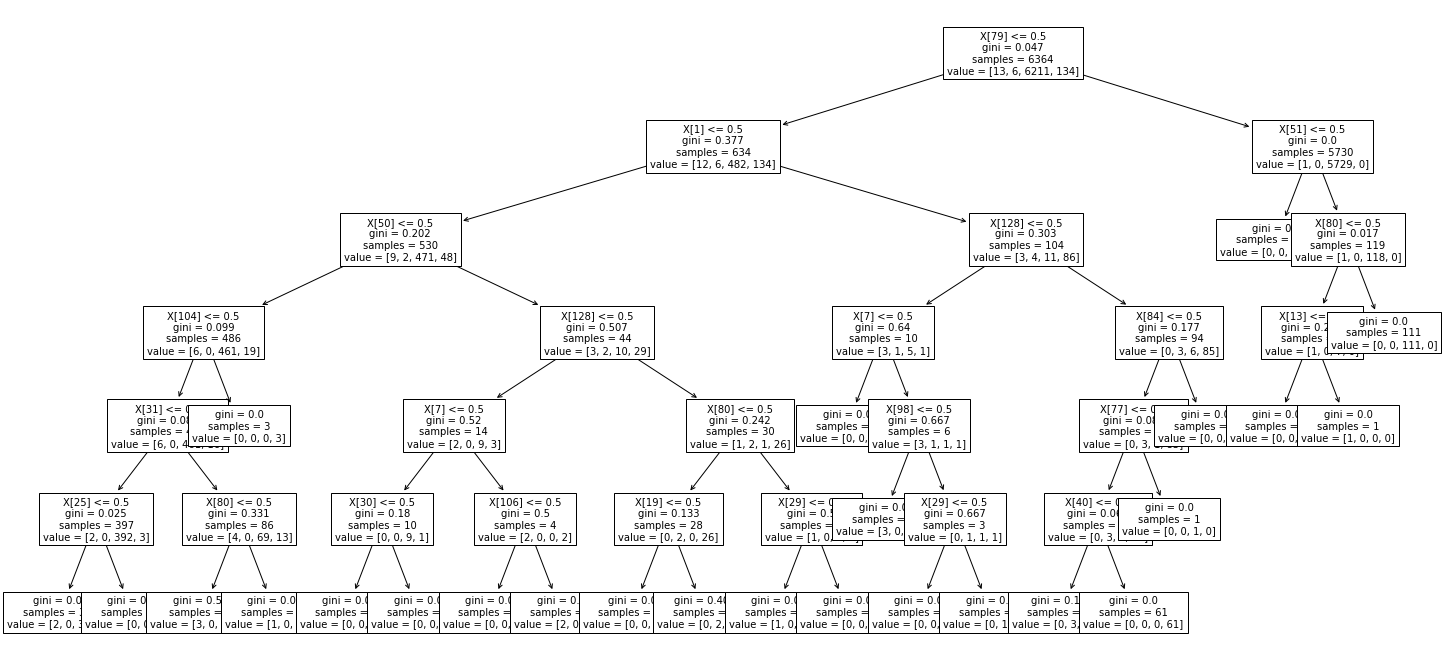

In [18]:
plt.figure(figsize=(25,12))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [112]:
X_result = clf.predict(X_test)

In [7]:
decision_tree_result = pd.DataFrame()

In [8]:
decision_tree_result['Inhospital mortality\nYes:1\nNo:0'] = X_result

In [9]:
decision_tree_result.to_csv("test_decision_tree.csv")

In [11]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

In [12]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 853 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 79] <= 0.5 else to node 50.
	node=1 is a split node: go to node 2 if X[:, 84] <= 0.5 else to node 25.
		node=2 is a split node: go to node 3 if X[:, 94] <= 0.5 else to node 20.
			node=3 is a split node: go to node 4 if X[:, 140] <= 0.5 else to node 17.
				node=4 is a split node: go to node 5 if X[:, 144] <= 0.5 else to node 14.
					node=5 is a split node: go to node 6 if X[:, 136] <= 0.5 else to node 11.
						node=6 is a split node: go to node 7 if X[:, 147] <= 0.5 else to node 8.
							node=7 is a leaf node.
							node=8 is a split node: go to node 9 if X[:, 13] <= 0.5 else to node 10.
								node=9 is a leaf node.
								node=10 is a leaf node.
						node=11 is a split node: go to node 12 if X[:, 26] <= 0.5 else to node 13.
							node=12 is a leaf node.
							node=13 is a leaf node.
					node=14 is a split node: go to node 15 if X[:, 26] <= 0.5 else to

In [15]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:



KeyError: (0, 79)

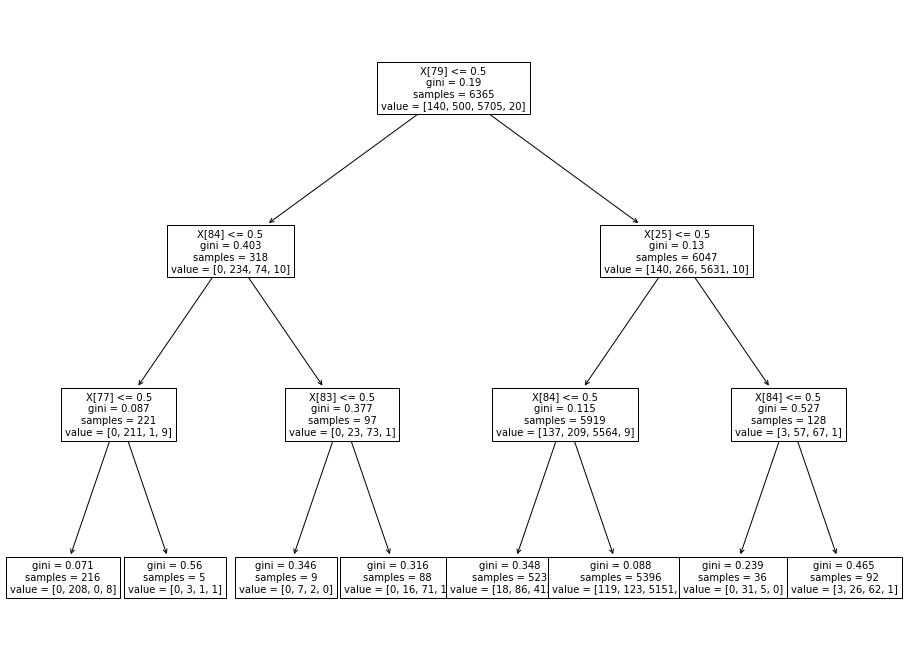

In [20]:
plt.figure(figsize=(16,12))
tree.plot_tree(clf, fontsize=10)
plt.show()